In [5]:
import pandas as pd

def remove_dollar (value:str)->float:
    return float(value[1:])

df= pd.read_csv ('M08/data/fb.csv',
                parse_dates=['Date'],
                index_col = 'Date',
                dayfirst = True,
                engine = 'python'
            ).rename(columns={'Close/Last': 'Close_Last'}
            ).assign(
        Close_Last = lambda x: x['Close_Last'].map(remove_dollar),
       Open = lambda x: x['Open'].map(remove_dollar),
        High = lambda x: x['High'].map(remove_dollar),
        Low = lambda x: x['Low'].map(remove_dollar)
            ).sort_values(
                            by=['Date'], axis=0, ascending=True
            ).assign (
        Open_Avarage = lambda x: x['Open'].rolling(14).mean()
          )
            
df

C:\Users\jacek\AppData\Local\Temp\ipykernel_10716\2104955663.py:6: UserWarning: Parsing dates in MM/DD/YYYY format when dayfirst=True was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df= pd.read_csv ('M08/data/fb.csv',


,Close_Last,Volume,Open,High,Low,Open_Avarage
Date,,,,,,
2012-01-06,27.720,41837160,28.892,29.15,27.39,NaN
2012-01-08,20.880,44488370,21.500,21.58,20.84,NaN
2012-01-10,21.990,51198150,22.080,22.59,21.73,NaN
2012-01-11,21.210,37631000,21.080,21.44,21.01,NaN
2012-02-07,30.771,14110230,31.250,31.73,30.55,NaN
...,...,...,...,...,...,...
2021-12-03,268.400,20600200,269.140,269.74,264.02,303.511500
2021-12-04,311.540,10881940,311.050,312.15,307.93,306.540786
2021-12-05,302.550,24641010,301.130,304.96,298.19,305.596500


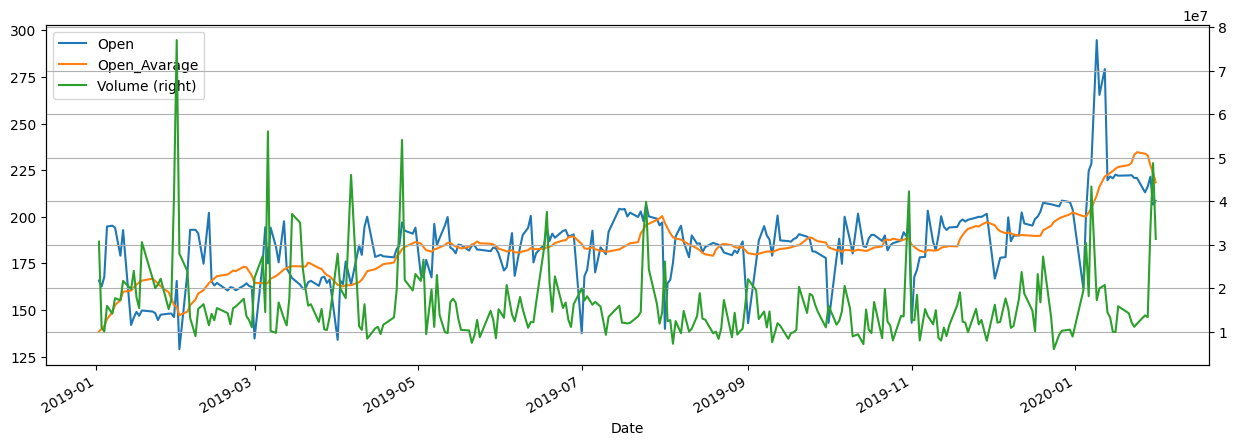

In [6]:
df ['2019':'2020 1'].plot (
    y=['Open', 'Open_Avarage', 'Volume'],
    figsize=(15, 5),
    secondary_y=('Volume'),
    grid=True    
);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2357 entries, 2012-05-18 to 2021-09-29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close_Last  2357 non-null   float64
 1   Volume      2357 non-null   int64  
 2   Open        2357 non-null   float64
 3   High        2357 non-null   float64
 4   Low         2357 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 110.5 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Close_Last,2357.0,1.394857e+02,8.439742e+01,17.729,74.83,131.04,1.853100e+02,3.821800e+02
Volume,2357.0,3.080838e+07,2.766896e+07,5913066.000,15577610.00,22131500.00,3.569320e+07,5.793775e+08
Open,2357.0,1.394342e+02,8.432121e+01,18.080,74.93,130.92,1.848500e+02,3.816800e+02
High,2357.0,1.410608e+02,8.529324e+01,18.270,75.55,132.13,1.868017e+02,3.843300e+02
Low,2357.0,1.377886e+02,8.339783e+01,17.550,74.01,129.70,1.832228e+02,3.788100e+02
